### Data 
https://polybox.ethz.ch/index.php/s/nQxmgoWOe1pTc3Y

# Classification of similar vertical structures in Indian Ocean [IO] Region

## Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc

import matplotlib.pyplot as plt
import cartopy.feature as cfeature 
import seaborn as sns
import cartopy.crs as ccrs
import cmocean

#import argopy
import pyxpcm
from pyxpcm.models import pcm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### ----- For BIC----

import itertools

from scipy import linalg
import matplotlib as mpl
from sklearn import mixture

## How to open jupyter file on HPC

+ to open Jupyter notebook in HPC
+ open terminal and type - ssh -X shikha@10.12.1.31
then type passswordd - shikha2018
+ then type conda activate wradlib
++ then type : jupyter-notebook --no-browser 
you will get one port number like localhost:8934
+ then open new terminal window and then type - ssh -N -f -L 8934 (which u got on 1st terminal):localhost:8934 shikha@10.12.1.31 and then enter password
+ now go to 1st terminal again and copy the line (++) and paste it in u r local browser preferabelly chrome and enter password if aasked...andd Done...!

In [2]:
ds98 = xr.open_dataset("/home/cccr/shikha/MAYUR/Project_Mayur/Data/updated4_30_120_30S_30N_0_1000_2010-01-01_2019-12-31_erddap.nc")


## Stats of Data

### Bar Plot of Argo Data from 2010 to 2019

In [3]:
ds=ds98.copy()

In [4]:
ds_time_year=ds.TIME.dt.year.values

ds_year_count=[]

for i in range(0,10):
    ds_year_count.append(ds_time_year.tolist().count(2010+i))
    
ds_year_count

[8764, 9882, 11286, 11722, 11148, 13819, 14458, 16091, 11379, 11723]

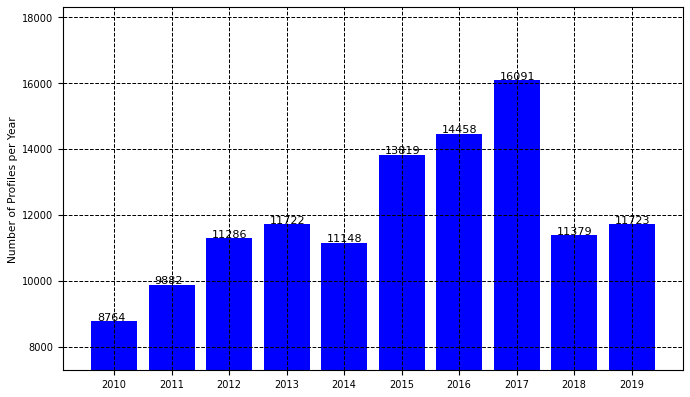

In [5]:
import math

## Decadal Sampling of Argo floats

from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)

x2 = np.arange(10)
y2 = [8764, 9882, 11286, 11722, 11148, 13819, 14458, 16091, 11379, 11723]

width = 0.8
  
# plot data in grouped manner of bar type
plt.bar(x2, y2, width, color='blue',align='center')


plt.xticks(x2, ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
label2 = ['8764', '9882', '11286', '11722', '11148', '13819', '14458', '16091', '11379', '11723']

for i in range(0,10):
    plt.text(x = x2[i]-0.3 , y = y2[i]+30, s = label2[i], size = 10)

    
# plt.xticks(x, ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
plt.ylabel("Number of Profiles per Year")
plt.grid(color = 'black', linestyle = 'dashed', linewidth = 0.9)


# "Y min and max"
low = min(y2)
high = max(y2)
plt.ylim([math.ceil(low-0.2*(high-low)), math.ceil(high+0.3*(high-low))])

plt.show()

In [6]:
### Plotting Monthly Data

ds_time_month=ds.TIME.dt.month.values

ds_month_count=[]
    

for i in range(0,12):
    ds_month_count.append(ds_time_month.tolist().count(1+i))
    
ds_month_count

[10538, 9466, 10220, 9899, 10335, 9731, 10152, 9995, 9746, 10167, 9942, 10081]

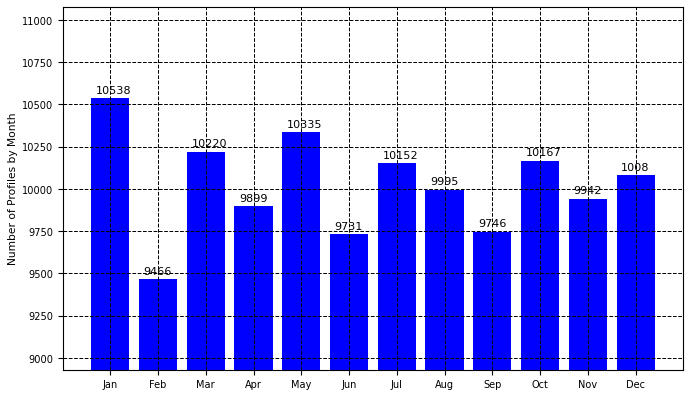

In [7]:
## Plotting Seasonal Sampling of Argo floats

from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)

x = np.arange(12)
y1 = [10538,9466,10220,9899,10335,9731,10152,9995,9746,10167,9942,10081]

width = 0.8
  
# plot data in grouped manner of bar type
plt.bar(x, y1, width, color='blue',align='center')


plt.xticks(x, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

label = ['10538','9466','10220','9899','10335','9731','10152','9995','9746','10167','9942','1008']

for i in range(0,12):
    plt.text(x = x[i]-0.3 , y = y1[i]+30, s = label[i], size = 10)



# plt.xticks(x, ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
plt.ylabel("Number of Profiles by Month")
plt.grid(color = 'black', linestyle = 'dashed', linewidth = 0.9)
low = min(y1)
high = max(y1)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])

# for i in range(len(y1)):
#     plt.annotate(x[i], (-0.1 + i, x[i] + j))

# plt.legend(["Round 1", "Round 2", "Round 3"])
plt.show()

### Flots intensity plots

In [8]:
ss=pd.DataFrame({'TIME':ds['TIME'].values,'LAT':ds['LATITUDE'].values,'LONG':ds['LONGITUDE'].values})
ss['Count']=1
ss.sort_values(by='LAT').sort_values(by='LONG')


##************************************************************************************************
z = np.arange(0,-1010,-10.0)
pcm_features = {'temperature': z, 'salinity':z}
m = pcm(K=8, features=pcm_features,maxvar=8)

In [9]:
vv=[]
x_range=range(-30,31,10)
y_range=range(30,121,10)
for x in range(len(x_range)-1):
    for y in range(len(y_range)-1):
#         print(x_range[x],x_range[x+1],y_range[y],y_range[y+1])
#         vv.append(ss[((ss['LAT'].between(x_range[x],x_range[x+1]))&(ss['LONG'].between(y_range[y],y_range[y+1])))].count()[0])
#         print(x_range[x],x_range[x+1],y_range[y],y_range[y+1])
        df_temp=ss[((ss['LAT'].between(x_range[x],x_range[x+1]))&
                    ss['LONG'].between(y_range[y],y_range[y+1]))]

        cnt=ss[((ss['LAT'].between(x_range[x],x_range[x+1]))&
                ss['LONG'].between(y_range[y],y_range[y+1]))].count()[0]

        df_temp['Count']=cnt
        vv.extend(df_temp.values)

/tmp/ipykernel_53492/3123859021.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Count']=cnt


In [10]:
f_data=pd.DataFrame(vv)
f_data.columns=ss.columns
# f_data

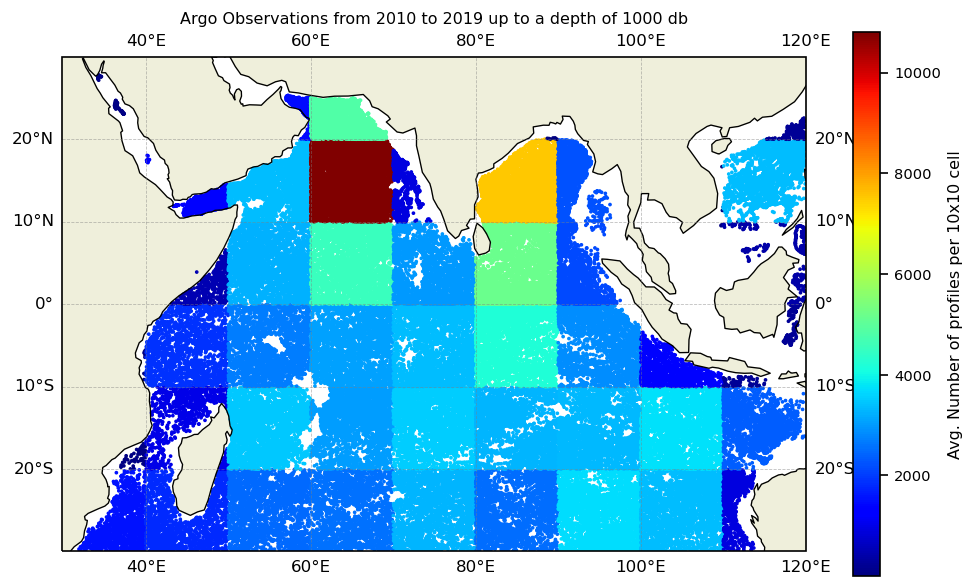

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import pyxpcm

proj = ccrs.PlateCarree()
subplot_kw = {'projection': proj, 'extent': np.array([30, 120, -22, 22]) + np.array([-0.1, +0.1, -0.1, +0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=120, subplot_kw=subplot_kw)

sc = plt.scatter(f_data['LONG'], f_data['LAT'], c=f_data['Count'], s=2, cmap='jet')

cl = plt.colorbar(sc)

# Adding latitude and longitude gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

ax.set_title('Argo Observations from 2010 to 2019 up to a depth of 1000 db')
cl.ax.set_ylabel('Avg. Number of profiles per 10x10 cell')

plt.show()


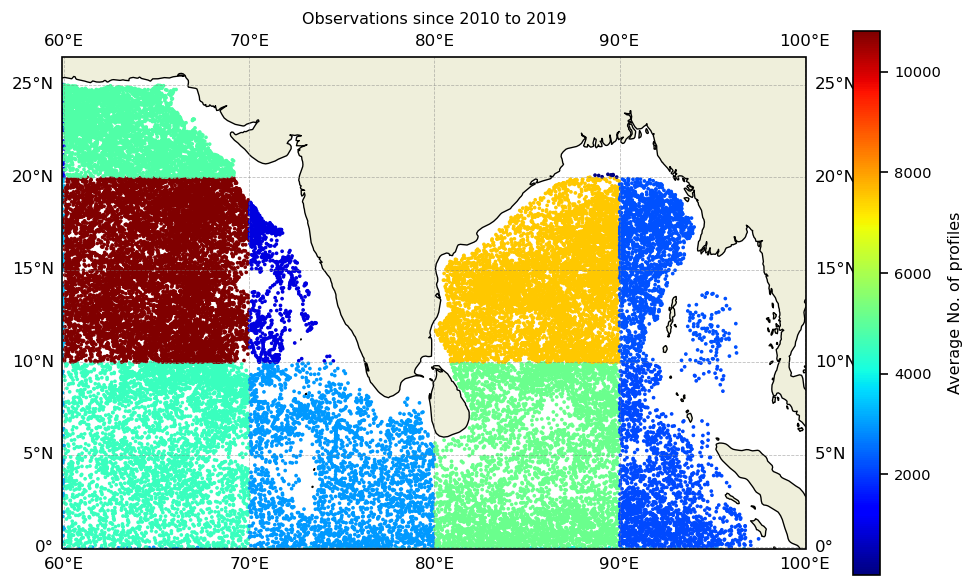

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import pyxpcm

proj = ccrs.PlateCarree()
subplot_kw = {'projection': proj, 'extent': np.array([60, 100, 0, 25]) + np.array([-0.1, +0.1, -0.1, +0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

sc = plt.scatter(f_data['LONG'], f_data['LAT'], c=f_data['Count'], s=2, cmap='jet')

cl = plt.colorbar(sc, label='Average No. of profiles')

gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

ax.set_title('Observations since 2010 to 2019')

plt.show()


## PCA Analysis

### PCA calculation of Temperature

In [13]:
df1=pd.DataFrame(ds98['TEMP'][:].values)

In [14]:
# np.mean(x),np.std(x)
x = StandardScaler().fit_transform(df1)
x = pd.DataFrame(x)

In [15]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)

In [16]:
pca_temp = pd.DataFrame(data = principalComponents)#,  columns = ['temperature_0','temperature_1', 'temperature_2','temperature_3','temperature_4','temperature_5','temperature_6'])#,'temperature_7'])


In [17]:
#pca_temp.values[0]#,pca_temp[0]

#### PCA of Temperature profiles Explained Variance and Sum

In [18]:
pca.explained_variance_ratio_

array([0.63451895, 0.21061024, 0.09549594, 0.01988383, 0.01587777,
       0.00716728, 0.00413616, 0.00251335])

In [19]:
 #sum(pca.explained_variance_ratio_)

### PCA calculation of Salinity

In [20]:
dfs=pd.DataFrame(ds98['PSAL'][:].values)

In [21]:
x2 = StandardScaler().fit_transform(dfs)
x2 = pd.DataFrame(x)

In [22]:
pca2 = PCA(n_components=8)

In [23]:
principalComponents = pca2.fit_transform(x2)

In [24]:
pca_psal = pd.DataFrame(data = principalComponents)#,  columns = ['salinity_0','salinity_1', 'salinity_2','salinity_3','salinity_4','salinity_5','salinity_6'])#,'salinity_7'])

In [25]:
# pca_psal

####  PCA_PSAL Explained Variance and Sum

In [26]:
pca2.explained_variance_ratio_ 

array([0.63451895, 0.21061009, 0.09549594, 0.01988384, 0.01587776,
       0.00716727, 0.00413617, 0.00251335])

In [27]:
#sum(pca2.explained_variance_ratio_)

## Bayesian information criteria (BIC)

### Randomly Selection of Profile

In [28]:
import random
list=[]
for i in range(1205):
        r=random.randint(1,120000)
        if r not in list: list.append(r)
            
            
            
list.sort()

In [29]:
rand_temp = pca_temp.iloc[list]
# rand_temp
rand_psal = pca_psal.iloc[list]
# rand_psal


In [30]:
np_psal=rand_psal.copy(). to_numpy()
np_temp=rand_temp.copy(). to_numpy()
ts1 = xr.DataArray([np_temp,np_psal])

### Gaussian Mixture Model Selection (Selection of number of classes $'K'$)

In [31]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 30)
cv_types = ['full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # fit a Gaussian mixture model
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(ts1[1])
        bic.append(gmm.bic(ts1[1]))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

In [32]:
# pip install mkl-service


/tmp/ipykernel_53492/717855891.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(n_components_range, bic, '.r-',markersize = 10,color='blue')


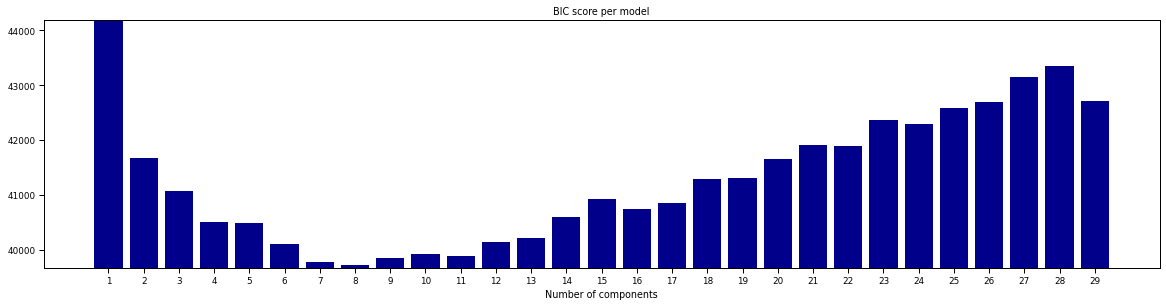

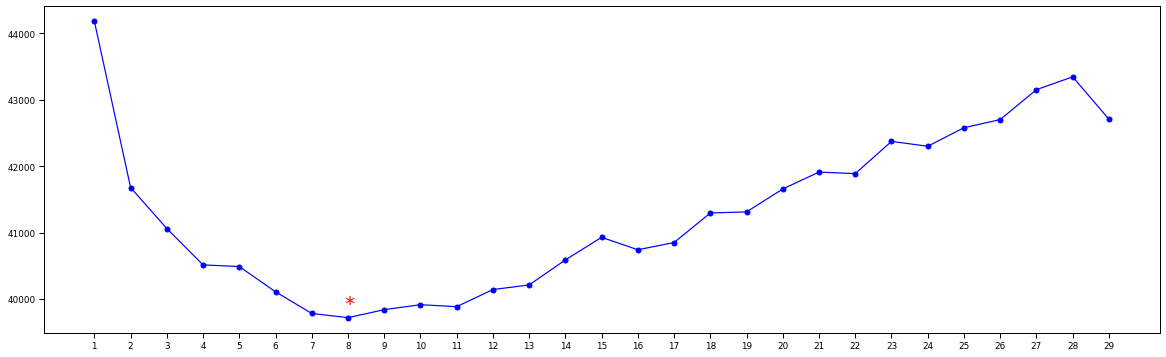

In [33]:
# Plot the BIC scores
plt.figure(figsize=(20, 10))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.8, color='darkblue',align='edge'))

plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
# xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
#     .2 * np.floor(bic.argmin() / len(n_components_range))
# plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xticks(n_components_range)
spl.set_xlabel('Number of components')
# spl.legend([b[0] for b in bars], cv_types)


#
minb = np.where(bic.min())
plt.figure(figsize=(20, 6))
plt.plot(n_components_range, bic, '.r-',markersize = 10,color='blue')
plt.xticks(n_components_range)
plt.text(7.9, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=20,color='red')


plt.show()

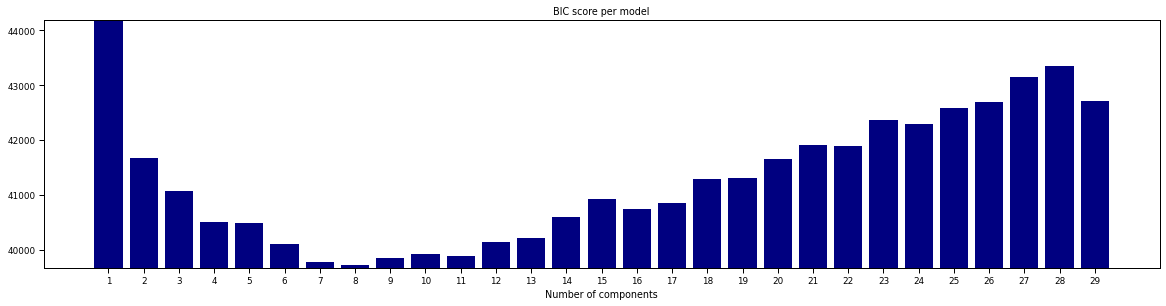

In [34]:
import itertools

# Define the colors for the cv_types
colors = ['navy', 'turquoise', 'cornflowerblue', 'darkorange']

plt.figure(figsize=(20, 10))
spl = plt.subplot(2, 1, 1)
bars = []
for i, (cv_type, color) in enumerate(zip(cv_types, itertools.cycle(colors))):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.8, color=color, align='edge'))

plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
plt.xticks(n_components_range)
spl.set_xlabel('Number of components')
plt.savefig("shikha_final_figures/BIC.png",dpi=300)

## _*$Gaussian Mixture Model $*_ [GMM]

### Fitting the Data to the Trained Model

In [67]:
z = np.arange(0,-1000.0,-10.0)
pcm_features = {'temperature': z,'salinity':z}

# z

In [68]:
m = pcm(K=8, features=pcm_features, maxvar=4)
m

<pcm 'gmm' (K: 8, F: 2)>
Number of class: 8
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: False
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>

In [69]:
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}
features_zdim='N_LEVELS'

In [70]:
m.fit(ds, features=features_in_ds, dim=features_zdim)

<pcm 'gmm' (K: 8, F: 2)>
Number of class: 8
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: True
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: -0.600649

In [71]:
m.predict(ds, features=features_in_ds,dim=features_zdim,inplace=True)

/home/cccr/shikha/miniconda3/envs/FERRET/lib/python3.9/site-packages/pyxpcm/xarray.py:89: UserWarning: PCM_LABELS variable already in the dataset: overwriting
  warnings.warn(("%s variable already in the dataset: overwriting") % (da.name))


<xarray.Dataset>
Dimensions:                (pcm_class: 8, N_PROF: 120272, N_LEVELS: 201,
                            quantile: 3)
Coordinates:
  * pcm_class              (pcm_class) int64 0 1 2 3 4 5 6 7
  * N_PROF                 (N_PROF) int64 0 1 2 3 ... 120269 120270 120271
  * N_LEVELS               (N_LEVELS) int64 0 -5 -10 -15 ... -990 -995 -1000
    LATITUDE               (N_PROF) float64 12.17 -12.68 ... -16.06 -21.54
    LONGITUDE              (N_PROF) float64 84.45 85.95 47.85 ... 51.92 78.89
    TIME                   (N_PROF) datetime64[ns] 2010-01-01T00:31:38 ... 20...
    N_PROF_                (N_PROF) int64 3016 9397 2000 5890 ... 6654 1170 8905
  * quantile               (quantile) float64 0.05 0.5 0.95
Data variables: (12/15)
    CONFIG_MISSION_NUMBER  (N_PROF) int64 1 1 1 1 1 1 1 1 ... 3 3 3 115 5 21 13
    CYCLE_NUMBER           (N_PROF) int64 238 112 1 33 26 ... 159 115 25 201 194
    PLATFORM_NUMBER        (N_PROF) int64 2900768 5901505 ... 1901792 5902358
    POSITION_QC            (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES                   (N_PROF, N_LEVELS) float32 0.0 5.0 ... 995.0 1e+03
    PRES_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    TEMP_QC                (N_PROF, N_LEVELS) int64 1 1 1 1 1 1 ... 1 1 1 1 1 1
    TIME_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PCM_LABELS             (N_PROF) int64 7 5 6 7 6 7 2 3 5 ... 1 2 2 2 0 4 0 0
    PCM_POST               (pcm_class, N_PROF) float64 3.157e-38 ... 0.00319
    TEMP_Q                 (pcm_class, quantile, N_LEVELS) float64 21.68 ... ...
    PSAL_Q                 (pcm_class, quantile, N_LEVELS) float64 34.41 ... ...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           shikha
    Fetched_date:         2021/04/04
    Fetched_constraints:  [x=30.00/120.00; y=-30.00/30.00; z=0.0/1000.0; t=20...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

In [72]:
m.predict_proba(ds, features=features_in_ds, dim=features_zdim,inplace=True)

/home/cccr/shikha/miniconda3/envs/FERRET/lib/python3.9/site-packages/pyxpcm/xarray.py:89: UserWarning: PCM_POST variable already in the dataset: overwriting
  warnings.warn(("%s variable already in the dataset: overwriting") % (da.name))


<xarray.Dataset>
Dimensions:                (pcm_class: 8, N_PROF: 120272, N_LEVELS: 201,
                            quantile: 3)
Coordinates:
  * pcm_class              (pcm_class) int64 0 1 2 3 4 5 6 7
  * N_PROF                 (N_PROF) int64 0 1 2 3 ... 120269 120270 120271
  * N_LEVELS               (N_LEVELS) int64 0 -5 -10 -15 ... -990 -995 -1000
    LATITUDE               (N_PROF) float64 12.17 -12.68 ... -16.06 -21.54
    LONGITUDE              (N_PROF) float64 84.45 85.95 47.85 ... 51.92 78.89
    TIME                   (N_PROF) datetime64[ns] 2010-01-01T00:31:38 ... 20...
    N_PROF_                (N_PROF) int64 3016 9397 2000 5890 ... 6654 1170 8905
  * quantile               (quantile) float64 0.05 0.5 0.95
Data variables: (12/15)
    CONFIG_MISSION_NUMBER  (N_PROF) int64 1 1 1 1 1 1 1 1 ... 3 3 3 115 5 21 13
    CYCLE_NUMBER           (N_PROF) int64 238 112 1 33 26 ... 159 115 25 201 194
    PLATFORM_NUMBER        (N_PROF) int64 2900768 5901505 ... 1901792 5902358
    POSITION_QC            (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES                   (N_PROF, N_LEVELS) float32 0.0 5.0 ... 995.0 1e+03
    PRES_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    TEMP_QC                (N_PROF, N_LEVELS) int64 1 1 1 1 1 1 ... 1 1 1 1 1 1
    TIME_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PCM_LABELS             (N_PROF) int64 7 5 6 7 6 7 2 3 5 ... 1 2 2 2 0 4 0 0
    PCM_POST               (pcm_class, N_PROF) float64 7.62e-25 ... 0.0
    TEMP_Q                 (pcm_class, quantile, N_LEVELS) float64 21.68 ... ...
    PSAL_Q                 (pcm_class, quantile, N_LEVELS) float64 34.41 ... ...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           shikha
    Fetched_date:         2021/04/04
    Fetched_constraints:  [x=30.00/120.00; y=-30.00/30.00; z=0.0/1000.0; t=20...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

### Visualizing Results

#### Quantile Plots

In [73]:
for vname in ['TEMP', 'PSAL']:
    ds= ds.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)
# ds

/home/cccr/shikha/miniconda3/envs/FERRET/lib/python3.9/site-packages/pyxpcm/xarray.py:89: UserWarning: TEMP_Q variable already in the dataset: overwriting
  warnings.warn(("%s variable already in the dataset: overwriting") % (da.name))
/home/cccr/shikha/miniconda3/envs/FERRET/lib/python3.9/site-packages/pyxpcm/xarray.py:89: UserWarning: PSAL_Q variable already in the dataset: overwriting
  warnings.warn(("%s variable already in the dataset: overwriting") % (da.name))


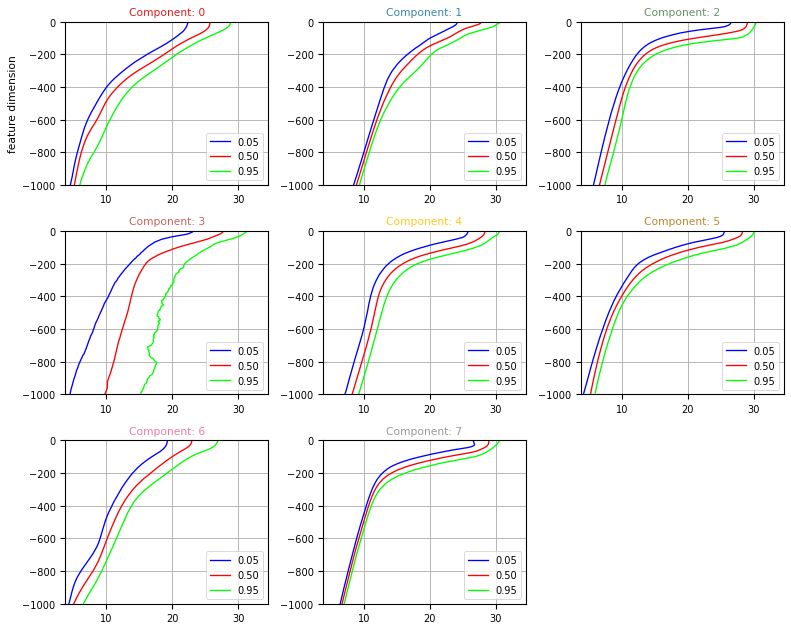

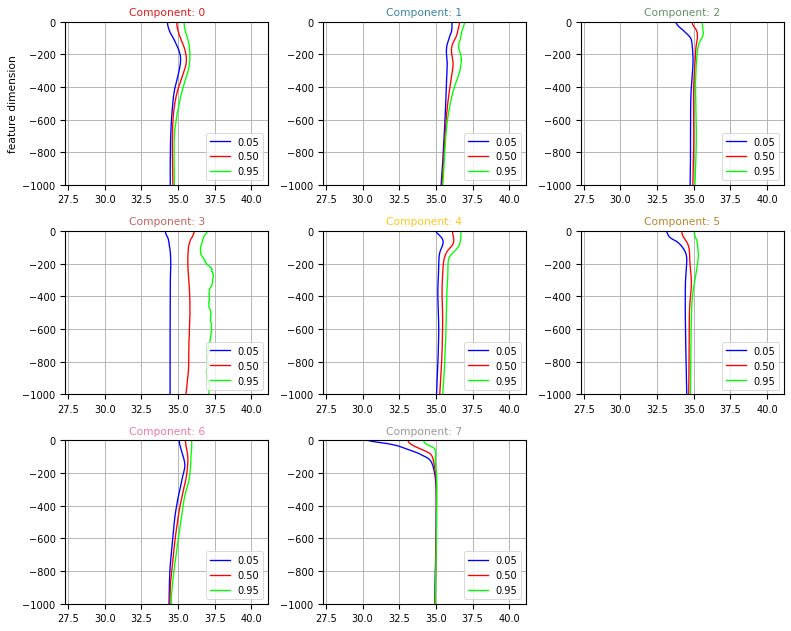

In [74]:
fig1, ax1 = m.plot.quantile(ds['TEMP_Q']) #only plotting Tempe quantiles here
plt.savefig("shikha_final_figures/temp_quartile.png",dpi=300)

fig2, ax2 = m.plot.quantile(ds['PSAL_Q']) #only plotting Tempe quantiles here
plt.savefig("shikha_final_figures/salt_quartile.png",dpi=300)

In [75]:
# fig, ax = m.plot.quantile(ds['PSAL_Q'])
# plt.savefig("quantile2.jpg")


#### Cluster's 

/home/cccr/shikha/miniconda3/envs/FERRET/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/cccr/shikha/miniconda3/envs/FERRET/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


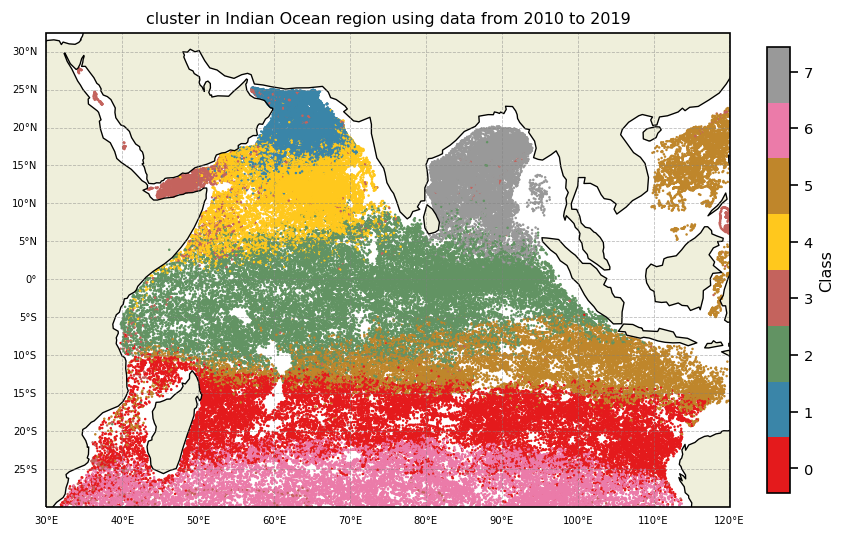

In [76]:
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([30,120,-22,24]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

kmap = m.plot.cmap()
#kmap = m.plot.Accent
sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=0.5, c=ds['PCM_LABELS'], cmap=kmap, transform=proj, vmin=0, vmax=m.K)
cl = m.plot.colorbar(ax=ax)

gl = m.plot.latlongrid(ax, dx=10)
ax.add_feature(cfeature.LAND, facecolor=cfeature.COLORS['land'])
ax.add_feature(cfeature.COASTLINE)
ax.set_title('cluster in Indian Ocean region using data from 2010 to 2019')
# plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/500-1000_clusters02_var8.png",dpi=800)
#plt.show()
plt.savefig("shikha_final_figures/clusters.png",dpi=300)

In [77]:
m.to_netcdf('my_pcm.nc')

In [46]:
# proj = ccrs.PlateCarree()
# subplot_kw={'projection': proj, 'extent': np.array([30,120,-22,24]) + np.array([-0.1,+0.1,-0.1,+0.1])}
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

# # kmap = m.plot.cmap()
# sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'],s=0.5, c=ds['PCM_LABELS'], cmap='jet', transform=proj, vmin=0, vmax=7)
# # cl = m.plot.colorbar()

# gl = m.plot.latlongrid(ax, dx=10)
# ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
# ax.set_title('LABELS of the training set')
# plt.colorbar(sc,)
# # plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/clusters09_var3.png",dpi=800)
# plt.show()


#### Posterior Probabilities of profiles

/home/cccr/shikha/miniconda3/envs/FERRET/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/cccr/shikha/miniconda3/envs/FERRET/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


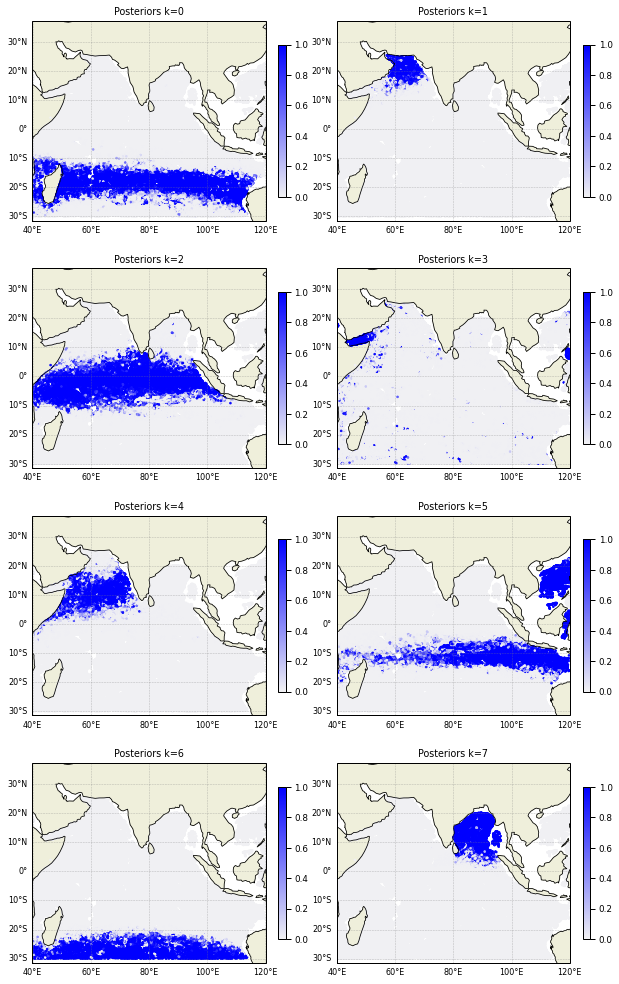

In [78]:
cmap = sns.light_palette("blue", as_cmap=True)
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([40,120,-25,30]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = m.plot.subplots(figsize=(10,22), maxcols=2, subplot_kw=subplot_kw)

for k in m:
    sc = ax[k].scatter(ds['LONGITUDE'], ds['LATITUDE'], s=3, c=ds['PCM_POST'].sel(pcm_class=k),
                       cmap=cmap, transform=proj, vmin=0, vmax=1)
    cl = plt.colorbar(sc, ax=ax[k], fraction=0.03)
    gl = m.plot.latlongrid(ax[k], fontsize=8, dx=20, dy=10)
    ax[k].add_feature(cfeature.LAND)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].set_title('Posteriors k=%i' % k)

plt.savefig("shikha_final_figures/posterior.png",dpi=300)
# plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/500-1000_Posteriors02_var8.jpg")

### T & S profiles for each cluster

In [79]:
n_cluster=8

In [80]:
for i in range(0,n_cluster):
    globals()['ds_class'+str(i)]=ds.where(ds['PCM_LABELS']==i,drop=True)
    
    globals()['ds_prop'+str(i)]=globals()['ds_class'+str(i)]['TEMP'].mean().values #temp mean
    globals()['ds_prop'+str(i)] = np.append(globals()['ds_prop'+str(i)],globals()['ds_class'+str(i)]['TEMP'].std().values)
    globals()['ds_prop'+str(i)] = np.append(globals()['ds_prop'+str(i)],globals()['ds_class'+str(i)]['TEMP'].min().values)
    globals()['ds_prop'+str(i)] = np.append(globals()['ds_prop'+str(i)],globals()['ds_class'+str(i)]['TEMP'].max().values)
    
    globals()['ds_prop'+str(i)] = np.append(globals()['ds_prop'+str(i)],globals()['ds_class'+str(i)]['PSAL'].mean().values)
    globals()['ds_prop'+str(i)] = np.append(globals()['ds_prop'+str(i)],globals()['ds_class'+str(i)]['PSAL'].std().values)
    globals()['ds_prop'+str(i)] = np.append(globals()['ds_prop'+str(i)],globals()['ds_class'+str(i)]['PSAL'].min().values)
    globals()['ds_prop'+str(i)] = np.append(globals()['ds_prop'+str(i)],globals()['ds_class'+str(i)]['PSAL'].max().values)
    
    globals()['ds_prop'+str(i)] = np.append(globals()['ds_prop'+str(i)],len(globals()['ds_class'+str(i)]['N_PROF'])) # Number of profils in class 


In [81]:
ds_prop7

array([1.20641985e+01, 5.99497986e+00, 5.14761496e+00, 4.25259933e+01,
       3.48657761e+01, 6.23771548e-01, 9.45999718e+00, 3.68563232e+01,
       1.27690000e+04])

In [82]:
%store ds_class0
%store ds_class1
%store ds_class2
%store ds_class3
%store ds_class4
%store ds_class5
%store ds_class6
%store ds_class7

Stored 'ds_class0' (Dataset)
Stored 'ds_class1' (Dataset)
Stored 'ds_class2' (Dataset)
Stored 'ds_class3' (Dataset)
Stored 'ds_class4' (Dataset)
Stored 'ds_class5' (Dataset)
Stored 'ds_class6' (Dataset)
Stored 'ds_class7' (Dataset)


In [83]:
for i in range(0,k+1):
    print(globals()['ds_class'+str(i)]['TEMP_Q'].shape)


(8, 3, 201, 21260)
(8, 3, 201, 10691)
(8, 3, 201, 27065)
(8, 3, 201, 3239)
(8, 3, 201, 14569)
(8, 3, 201, 17495)
(8, 3, 201, 13184)
(8, 3, 201, 12769)


In [53]:
#tr_std

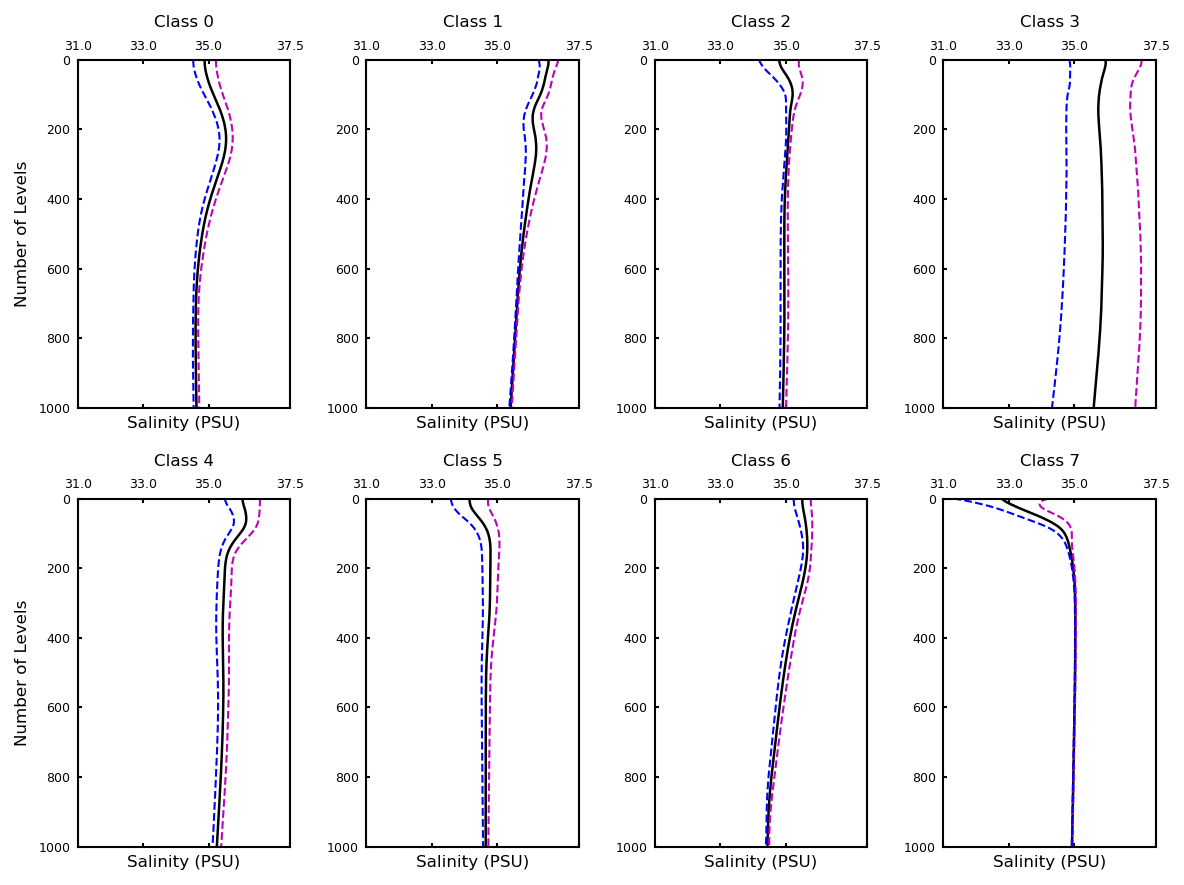

In [86]:
fig=plt.figure(figsize=[8,6],dpi=150)
for i in range(0,8):
    plt.subplot(2,4,i+1)
    tr=globals()['ds_class'+str(i)]['PSAL'].mean(dim='N_PROF');tr_std=globals()['ds_class'+str(i)]['PSAL'].std(dim='N_PROF')
    plt.plot(tr,ds_class0['N_LEVELS']*-1,'k',)
    plt.plot(tr+tr_std,ds_class0['N_LEVELS']*-1,'m--',linewidth=1, markersize=5)
    plt.plot(tr-tr_std,ds_class0['N_LEVELS']*-1,'b--',linewidth=1, markersize=5)
    plt.xlabel('Salinity (PSU)',fontsize=8)
    plt.title('Class %i'%(i),fontsize=8)
    plt.xticks([31,33,35,37.5],fontsize=7)
    plt.tick_params(labelbottom=False,labeltop=True,bottom =True,top=True,direction ='in',labelsize=6,length=2)
    plt.ylim(1000,0)
#     plt.xlim(31,37.5)
    if ((i==0)or(i==4)):
        plt.ylabel('Number of Levels',fontsize=8)
plt.tight_layout()
plt.savefig("shikha_final_figures/salt_class.png",dpi=300)
#plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/PSAL_mean_std_c08_var4.jpg",dpi=300)

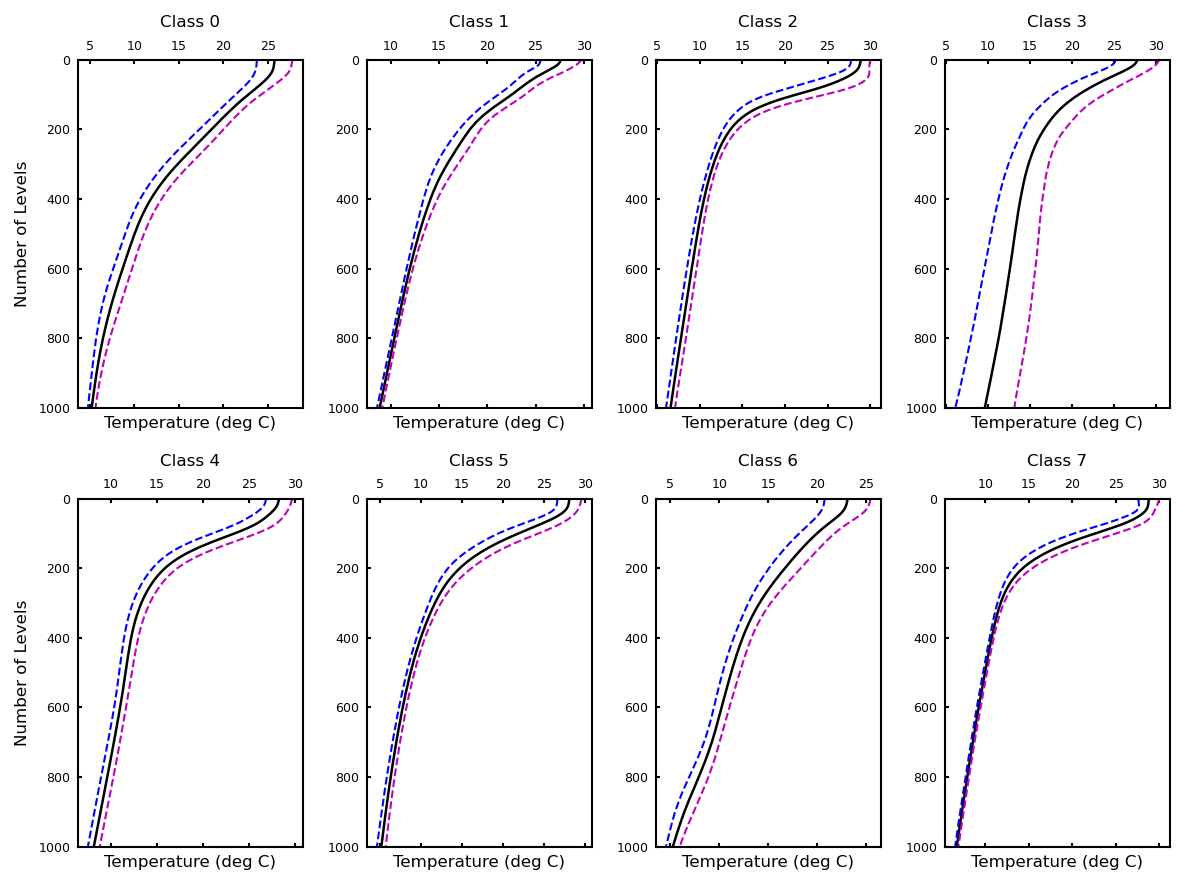

In [87]:
fig=plt.figure(figsize=[8,6],dpi=150)
for i in range(0,8):
    plt.subplot(2,4,i+1)
    tr=globals()['ds_class'+str(i)]['TEMP'].mean(dim='N_PROF');tr_std=globals()['ds_class'+str(i)]['TEMP'].std(dim='N_PROF')
    plt.plot(tr,ds_class0['N_LEVELS']*-1,'k',)
    plt.plot(tr+tr_std,ds_class0['N_LEVELS']*-1,'m--',linewidth=1, markersize=5)
    plt.plot(tr-tr_std,ds_class0['N_LEVELS']*-1,'b--',linewidth=1, markersize=5)
    plt.xlabel('Temperature (deg C)',fontsize=8)
    plt.title('Class %i'%(i),fontsize=8)
   # plt.xticks([31,33,35,37.5],fontsize=7)
    plt.tick_params(labelbottom=False,labeltop=True,bottom =True,top=True,direction ='in',labelsize=6,length=2)
    plt.ylim(1000,0)
#     plt.xlim(31,37.5)
    if ((i==0)or(i==4)):
        plt.ylabel('Number of Levels',fontsize=8)
plt.tight_layout()
plt.savefig("shikha_final_figures/temp_class.png",dpi=300)
#plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/PSAL_mean_std_c08_var4.jpg",dpi=300)

#### Other Plots

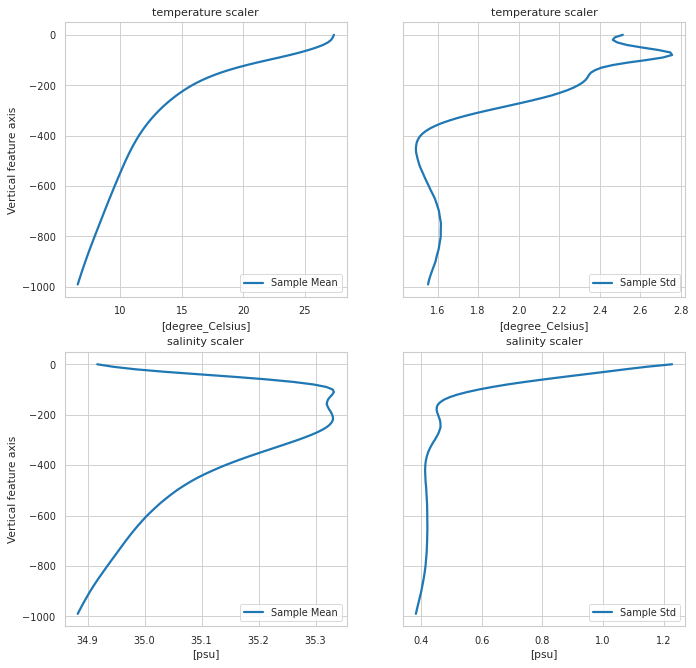

In [56]:
fig, ax = m.plot.scaler()
# plt.savefig("sacler02.jpg")

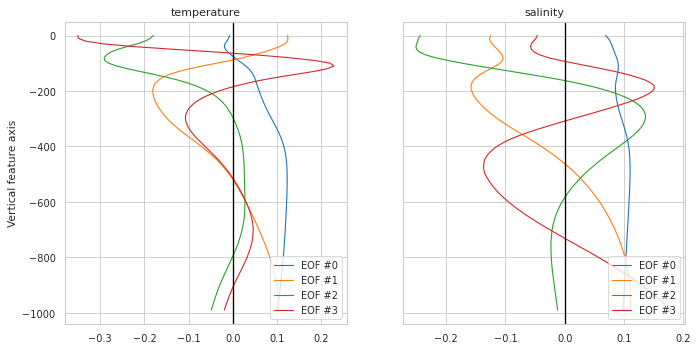

In [57]:
fig, ax = m.plot.reducer()

# Equivalent to:
# pcmplot.reducer(m)

# More options:
# m.plot.reducer(pcalist = range(0,2));
# m.plot.reducer(pcalist = [0], maxcols=1);
# m.plot.reducer(pcalist = range(0,2), style='darkgrid',  plot_kw={'linewidth':1.5}, subplot_kw={'ylim':[-1000,0]}, figsize=(12,10));

# plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/reducer09_var3.jpg")

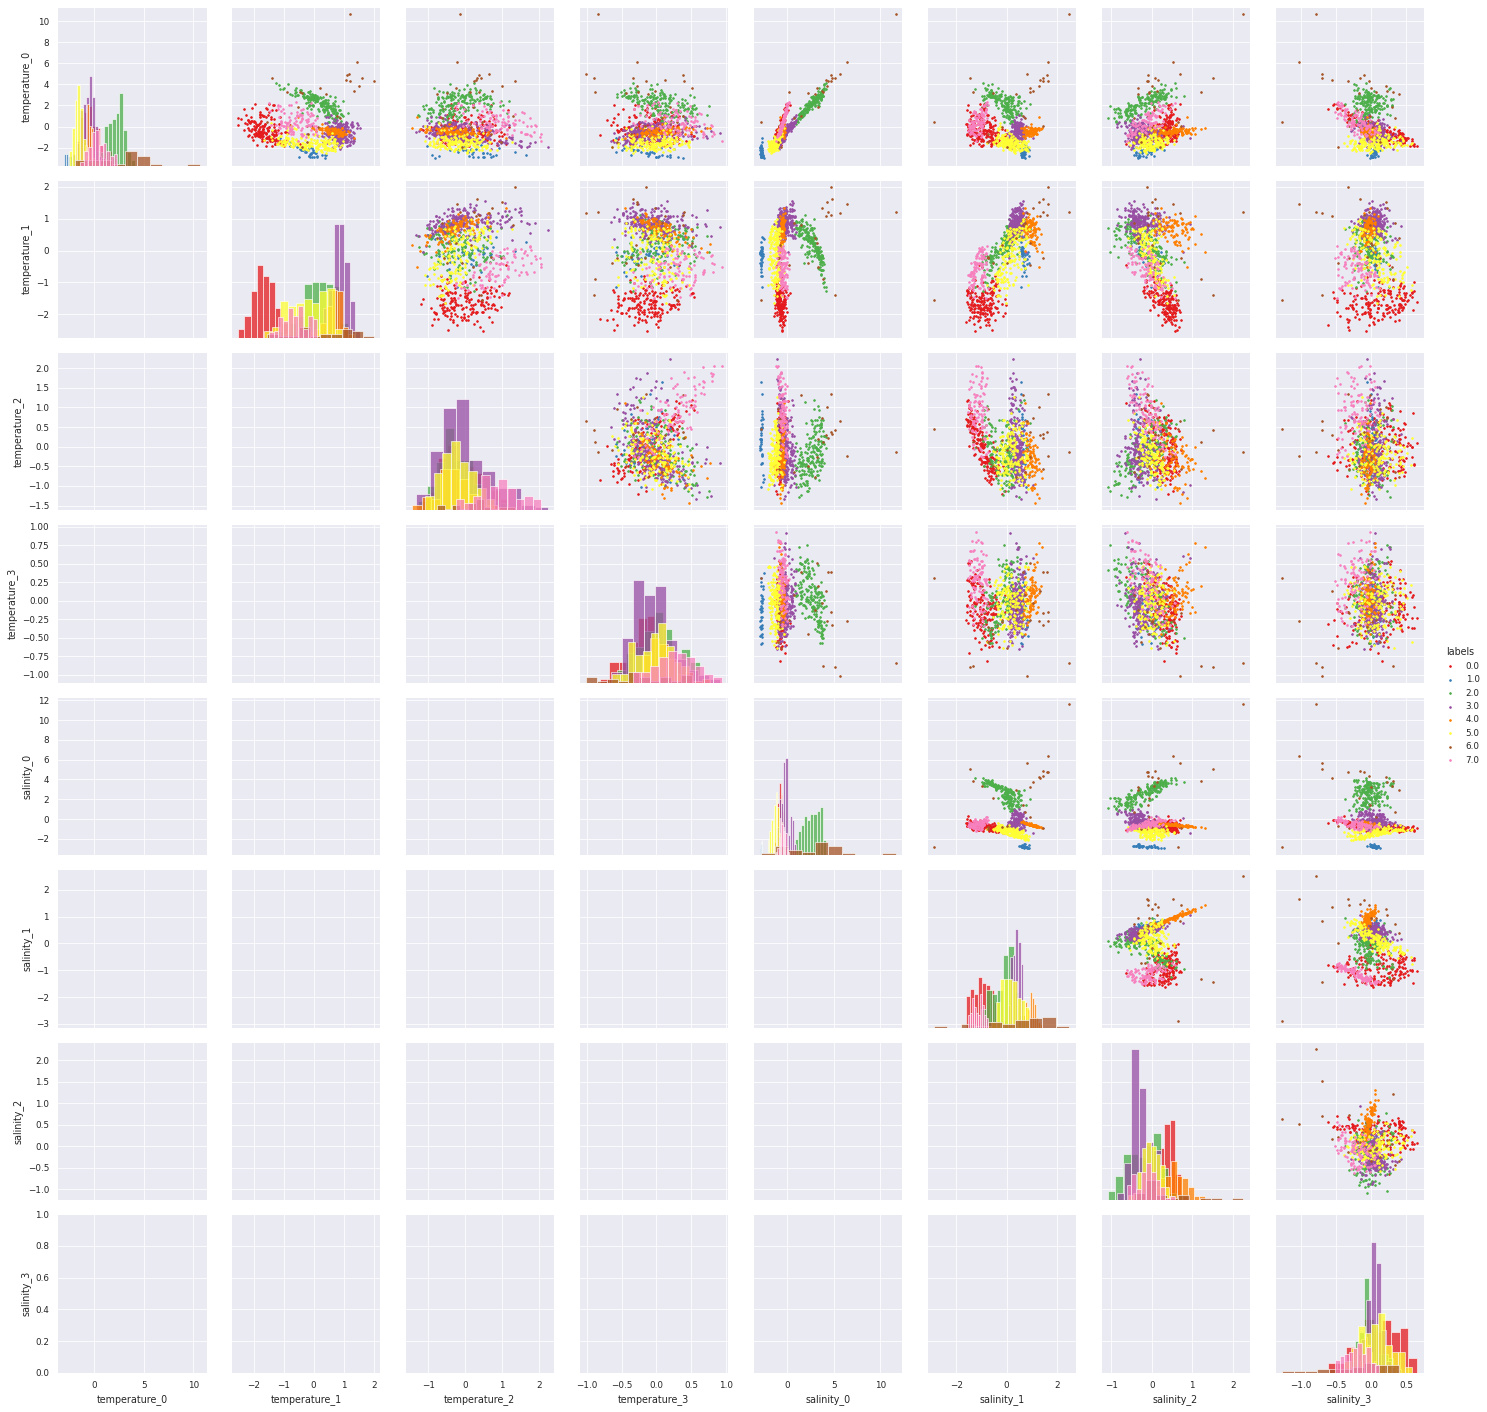

In [58]:
g = m.plot.preprocessed(ds, features=features_in_ds,dim =features_zdim, style='darkgrid')
# plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/PCA_09_var3.jpg")

In [59]:
# def plot_pmesh(ds):
#     fig = plt.figure(figsize=(8,12))
# #     df.sort_values(by=['LONGITUDE', 'LATITUDE'], ascending=[True, False], inplace=True)
# #     granularity = 50j
# #     df.sort_values(by=['LONGITUDE', 'LATITUDE'], ascending=[True, False], inplace=True)
#     x = ds['LONGITUDE'].values
#     y = ds['LATITUDE'].values
#     z = ds['N_PROF'].values
#     ax = plt.axes(projection=ccrs.PlateCarree())
#     plt.title('number of profiles in a 10x10 grid')

#     ax.coastlines(zorder=1)
#     sct = plt.scatter(x, y, c=z,s=15, cmap=cmocean.cm.dense,zorder=0)
#     cbar = fig.colorbar(sct, cmap=cmocean.cm.dense, shrink=.25)
#     return fig

# plt.show()

In [60]:
# # Profile Plot
# N_PROF = 100000 #Specify a profile to plot

# for i in range(0,10):
#     plt.plot(ds.TEMP[i], ds.PRES[i])
# #     plt.plot(ds.PSAL[21], ds.PRES[21])

# plt.xlabel('Temperature (C)')
# plt.ylabel('Pressure (dbar)')
# # plt.title('Argo Profile from %s' % ds.juld[N_PROF].dt.strftime('%a, %b %d %H:%M').values)

# plt.gca().invert_yaxis() #Flip the y-axis

In [61]:
# # T-S Diagram with depth
# plt.figure(figsize=(8,6))

# # nprof = 25 #Selected profile
# for i in range(0,500):
#     plt.scatter(ds.PSAL[i], ds.TEMP[i], c=ds.PRES[i], cmap='viridis_r')

    
# plt.xlabel('Salinity');
# plt.ylabel('Temperature (°C)')

# cbh = plt.colorbar();
# cbh.set_label('Pressure (dbar)')
# # plt.savefig('tempvssal.jpg')

## Conclusions

# Extra Stuff

## BIC

In [62]:
dt = ds['TEMP'][0]
dp = ds['PSAL'][0]

In [63]:
rand_temp.values[0]

array([ -4.215414  , -14.290973  ,  -1.5804873 ,  -3.14904   ,
         0.9540298 ,   1.9834776 ,   0.727525  ,   0.32226163],
      dtype=float32)

In [64]:
ts = xr.DataArray([dt,dp])

In [65]:
# # Plot the winner
# splot = plt.subplot(2, 1, 2)
# Y_ = clf.predict(rand_temp)
# for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
#                                            color_iter)):
#     v, w = linalg.eigh(cov)
#     if not np.any(Y_ == i):
#         continue
#     plt.scatter(rand_temp[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

#     # Plot an ellipse to show the Gaussian component
#     angle = np.arctan2(w[0][1], w[0][0])
#     angle = 180. * angle / np.pi  # convert to degrees
#     v = 2. * np.sqrt(2.) * np.sqrt(v)
#     ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
#     ell.set_clip_box(splot.bbox)
#     ell.set_alpha(.5)
#     splot.add_artist(ell)

In [66]:
# later, just do a very simple bic plot
# bic = np.array(bic)

# # plot the BIC scores
# plt.figure(figsize=(20, 10))
# plt.style.use('seaborn-darkgrid')
# spl = plt.subplot(2, 1, 1)
# plt.plot(n_components_range,bic)
# plt.xticks(n_components_range)
# plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
# plt.title('BIC score per model')
# xpos = np.where(bic == np.amin(bic))[0][0] + n_components_range[0]
# plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
# spl.set_xlabel('Number of components')
# plt.show()

# # numbers of components
# n_comp = best_gmm.n_components

# # print best number of classes
# print('Number of classes with minimum BIC score')
# print(n_comp)